## Wrangling and Analyzing **WeRateDog's** Data

## Table of Contents
- [1. Introduction](#intro)
- [2. Gathering Data](#gathering)
- [3. Assessing Data](#assessing)
- [4. Cleaning](#cleaning)
- [5. Storing, Analyzing, and Visualizing Data](#sav)
- [6. Reporting](#reporting)


<a id='intro'></a>
### 1. Introduction

[WeRateDogs](https://twitter.com/dog_rates) is a Twitter account that classify and rates pictures of dogs with a humorous comment about the dog. 
My goal here is to perform a data wrangling process (Gather, Assess, Cleaning) using 3 sources of data (listed below), and analyze and visualize the data after the wrangling process to report some interesting findings.
- WeRateDogs Twitter archive (sent by WeRateDogs to Udacity, which provided it to this project)
- Tweet image predicitions of dog's breeds on each tweet resulted from a neural network - sourced on [Udacity's server](https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv)
- Retweet count and favorite count for each WeRateDogs' tweet, queried on a Twitter API 

<a id='gathering'></a>
### 2. Gathering Data

In [594]:
# Importing all the necessary Python modules for this project
import pandas as pd
import numpy as np
import requests
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### 2.1. Reading the the `twitter_archive_enhanced.csv` into a pandas Dataframe

In [29]:
# Reading the file into a pandas dataframe
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

#### 2.2. Downloading the `image-predictions.tsv` from Udacity's server and Reading it into a pandas dataframe 

In [30]:
# Downloading the image-predictions file from Udacity's server and saving it as 'image_predictions.tsv'
response = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
with open('image_predictions.tsv', mode = 'wb') as file:
    file.write(response.content)

In [31]:
# Reading the downloaded file into a pandas dataframe
image_predictions = pd.read_csv('image_predictions.tsv', delimiter = '\t')

#### 2.3. Querying Twitter API data using the tweets' ID's from WeRateDogs and saving it into `tweet_json.txt` file

In [32]:
# Making the API connection
consumer_key = '' # Put your key here
consumer_secret = '' # Put your consumer key secret here
access_token = '' # Put your token here
access_secret = '' # Put your token secret here

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

# set Twitter's rate limit
api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [33]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()

# Storing tweet id's from twitter_archive on a list to find its respective data on the API in the loop
tweet_ids = twitter_archive.tweet_id.values

# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w', encoding="utf8") as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293

Success
519: 810657578271330305
Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success


Success
776: 776201521193218049
Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807

Rate limit reached. Sleeping for: 575


Success
902: 758474966123810816
Success
903: 758467244762497024
Success
904: 758405701903519748
Success
905: 758355060040593408
Success
906: 758099635764359168
Success
907: 758041019896193024
Success
908: 757741869644341248
Success
909: 757729163776290825
Success
910: 757725642876129280
Success
911: 757611664640446465
Success
912: 757597904299253760
Success
913: 757596066325864448
Success
914: 757400162377592832
Success
915: 757393109802180609
Success
916: 757354760399941633
Success
917: 756998049151549440
Success
918: 756939218950160384
Success
919: 756651752796094464
Success
920: 756526248105566208
Success
921: 756303284449767430
Success
922: 756288534030475264
Success
923: 756275833623502848
Success
924: 755955933503782912
Success
925: 755206590534418437
Success
926: 755110668769038337
Success
927: 754874841593970688
Success
928: 754856583969079297
Success
929: 754747087846248448
Success
930: 754482103782404096
Success
931: 754449512966619136
Success
932: 754120377874386944
Success


Success
1154: 725729321944506368
Success
1155: 725458796924002305
Success
1156: 724983749226668032
Success
1157: 724771698126512129
Success
1158: 724405726123311104
Success
1159: 724049859469295616
Success
1160: 724046343203856385
Success
1161: 724004602748780546
Success
1162: 723912936180330496
Success
1163: 723688335806480385
Success
1164: 723673163800948736
Success
1165: 723179728551723008
Success
1166: 722974582966214656
Success
1167: 722613351520608256
Success
1168: 721503162398597120
Success
1169: 721001180231503872
Success
1170: 720785406564900865
Success
1171: 720775346191278080
Success
1172: 720415127506415616
Success
1173: 720389942216527872
Success
1174: 720340705894408192
Success
1175: 720059472081784833
Success
1176: 720043174954147842
Success
1177: 719991154352222208
Success
1178: 719704490224398336
Success
1179: 719551379208073216
Success
1180: 719367763014393856
Success
1181: 719339463458033665
Success
1182: 719332531645071360
Success
1183: 718971898235854848
Success
11

Success
1403: 699423671849451520
Success
1404: 699413908797464576
Success
1405: 699370870310113280
Success
1406: 699323444782047232
Success
1407: 699088579889332224
Success
1408: 699079609774645248
Success
1409: 699072405256409088
Success
1410: 699060279947165696
Success
1411: 699036661657767936
Success
1412: 698989035503689728
Success
1413: 698953797952008193
Success
1414: 698907974262222848
Success
1415: 698710712454139905
Success
1416: 698703483621523456
Success
1417: 698635131305795584
Success
1418: 698549713696649216
Success
1419: 698355670425473025
Success
1420: 698342080612007937
Success
1421: 698262614669991936
Success
1422: 698195409219559425
Success
1423: 698178924120031232
Success
1424: 697995514407682048
Success
1425: 697990423684476929
Success
1426: 697943111201378304
Success
1427: 697881462549430272
Success
1428: 697630435728322560
Success
1429: 697616773278015490
Success
1430: 697596423848730625
Success
1431: 697575480820686848
Success
1432: 697516214579523584
Success
14

Success
1652: 683498322573824003
Success
1653: 683481228088049664
Success
1654: 683462770029932544
Success
1655: 683449695444799489
Success
1656: 683391852557561860
Success
1657: 683357973142474752
Success
1658: 683142553609318400
Success
1659: 683111407806746624
Success
1660: 683098815881154561
Success
1661: 683078886620553216
Success
1662: 683030066213818368
Success
1663: 682962037429899265
Success
1664: 682808988178739200
Success
1665: 682788441537560576
Success
1666: 682750546109968385
Success
1667: 682697186228989953
Success
1668: 682662431982772225
Success
1669: 682638830361513985
Success
1670: 682429480204398592
Success
1671: 682406705142087680
Success
1672: 682393905736888321
Success
1673: 682389078323662849
Success
1674: 682303737705140231
Success
1675: 682259524040966145
Success
1676: 682242692827447297
Success
1677: 682088079302213632
Success
1678: 682059653698686977
Success
1679: 682047327939461121
Success
1680: 682032003584274432
Success
1681: 682003177596559360
Success
16

Rate limit reached. Sleeping for: 602


Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
1809: 676897532954456065
Success
1810: 676864501615042560
Success
1811: 676821958043033607
Success
1812: 676819651066732545
Success
1813: 676811746707918848
Success
1814: 676776431406465024
Success
1815: 676617503762681856
Success
1816: 676613908052996102
Success
1817: 676606785097199616
Success
1818: 676603393314578432
Success
1819: 676593408224403456
Success
1820: 676590572941893632
Success
1821: 676588346097852417
Success
1822: 676582956622721024
Success
1823: 676575501977128964
Success
1824: 676533798876651520
Success
1825: 676496375194980353
Success
1826: 676470639084101634
Success
1827: 676440007570247681
Success
1828: 676430933382295552
Success
1829: 676263575653122048
Success
1830: 676237365392908289
Success
1831: 676219687039057920
Success
18

Success
2051: 671497587707535361
Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
2058: 671355857343524864
Success
2059: 671347597085433856
Success
2060: 671186162933985280
Success
2061: 671182547775299584
Success
2062: 671166507850801152
Success
2063: 671163268581498880
Success
2064: 671159727754231808
Success
2065: 671154572044468225
Success
2066: 671151324042559489
Success
2067: 671147085991960577
Success
2068: 671141549288370177
Success
2069: 671138694582165504
Success
2070: 671134062904504320
Success
2071: 671122204919246848
Success
2072: 671115716440031232
Success
2073: 671109016219725825
Fail
2074: 670995969505435648
Success
2075: 670842764863651840
Success
2076: 670840546554966016
Success
2077: 670838202509447168
Success
2078: 670833812859932673
Success
2079: 670832455012716544
Success
2080: 670826280409919488
Success
2081:

Success
2300: 667065535570550784
Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
2307: 666835007768551424
Success
2308: 666826780179869698
Success
2309: 666817836334096384
Success
2310: 666804364988780544
Success
2311: 666786068205871104
Success
2312: 666781792255496192
Success
2313: 666776908487630848
Success
2314: 666739327293083650
Success
2315: 666701168228331520
Success
2316: 666691418707132416
Success
2317: 666649482315059201
Success
2318: 666644823164719104
Success
2319: 666454714377183233
Success
2320: 666447344410484738
Success
2321: 666437273139982337
Success
2322: 666435652385423360
Success
2323: 666430724426358785
Success
2324: 666428276349472768
Success
2325: 666421158376562688
Success
2326: 666418789513326592
Success
2327: 666411507551481857
Success
2328: 666407126856765440
Success
2329: 666396247373291520
Success
23

In [34]:
# Create an empty list to store the tweets from the API connection
tweets_API_1 = []

tweet_json = open('tweet_json.txt', 'r')

for line in tweet_json:
    tweet = json.loads(line)
    tweets_API_1.append(tweet)
    
tweet_json.close()

In [36]:
# Getting only the tweet id's from the list of dictionaries fetch on the first API run and storing them on a list
tweet_id_API_1 = list(map(lambda tweet: tweet['id'], tweets_API_1))

In [46]:
# Creating a list of the remaining tweet id's to fetch on the next API connection 
tweets_to_fetch = list(set(twitter_archive.tweet_id) - set(tweet_id_API_1))

In [47]:
# As I found 25 missing tweets, I tried to fetch them running the API connection for the second time
len(tweets_to_fetch)

25

In [50]:
# Running the API connection again to get 2 more results and storing them in a .txt file
with open('tweet_json_second_API_run.txt', 'w', encoding="utf8") as outfile_2:
    for tweet_id in tweets_to_fetch:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile_2)
            outfile_2.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            pass

Fail
Fail
Fail
Success
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Success
Fail


In [51]:
# Gathering the tweets info from the first API connection and storing them on a list
API_1_tweets = []

tweet_json = open('tweet_json.txt', 'r')

for line in tweet_json:
    tweet = json.loads(line)
    API_1_tweets.append(tweet)
    
tweet_json.close()

In [53]:
# Storing the tweet's necessary data from the first API connection in a dataframe
API_1_tweet_data = pd.DataFrame()  
API_1_tweet_data['id'] = list(map(lambda tweet: tweet['id'], API_1_tweets))
API_1_tweet_data['retweet_count'] = list(map(lambda tweet: tweet['retweet_count'], API_1_tweets))
API_1_tweet_data['favorite_count'] = list(map(lambda tweet: tweet['favorite_count'], API_1_tweets))

In [54]:
# Gathering the tweets info from the second API connection and storing them on a list
API_2_tweets = []

tweet_json = open('tweet_json_second_API_run.txt', 'r')

for line in tweet_json:
    tweet = json.loads(line)
    API_2_tweets.append(tweet)
    
tweet_json.close()

In [55]:
# Storing the tweet's necessary data from the second API connection in a dataframe
API_2_tweet_data = pd.DataFrame()  
API_2_tweet_data['id'] = list(map(lambda tweet: tweet['id'], API_2_tweets))
API_2_tweet_data['retweet_count'] = list(map(lambda tweet: tweet['retweet_count'], API_2_tweets))
API_2_tweet_data['favorite_count'] = list(map(lambda tweet: tweet['favorite_count'], API_2_tweets))

In [58]:
API_1_tweet_data.shape

(2331, 3)

In [59]:
# Appending the dataframes from the first and second API connections
tweet_data = pd.concat([API_1_tweet_data, API_2_tweet_data], ignore_index=True, sort =False)

In [62]:
# Checking the concat()
tweet_data.shape

(2333, 3)

In [63]:
# Saving the tweet_data in a csv file just to avoid running the API again
tweet_data.to_csv('tweet_data.csv', index=False)

In [66]:
tweet_data = pd.read_csv('tweet_data.csv')
tweet_data.head(3)

,id,retweet_count,favorite_count
0,892420643555336193,7895,36994
1,892177421306343426,5865,31845
2,891815181378084864,3869,23985


<a id='assessing'></a>
### 3. Assessing Data

On this step, I used visual and programmatic assessment to verify quality and tidiness on each of the 3 dataframes.

In [971]:
# Loading the 3 datasets here again to avoid scrolling
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
image_predictions = pd.read_csv('image_predictions.tsv', delimiter = '\t')
tweet_data = pd.read_csv('tweet_data.csv')

In [972]:
# Display the twitter_archive dataframe
twitter_archive.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [973]:
# Checking datatypes on twitter_archive
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [974]:
# Checking the non-original tweets
twitter_archive.query('retweeted_status_id != "NaN"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Canela. She attempted some fancy porch pics. They were unsuccessful. 13/10 someone help her https://t.co/cLyzpcUcMX,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,"https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1",13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @Athletics: 12/10 #BATP https://t.co/WxwJmvjfxo,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,"https://twitter.com/dog_rates/status/886053434075471873,https://twitter.com/dog_rates/status/886053434075471873",12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Lilly. She just parallel barked. Kindly requests a reward now. 13/10 would pet so well https://t.co/SATN4If5H5,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,"https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1",13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Emmy. She was adopted today. Massive round of pupplause for Emmy and her new family. 14/10 for all involved https://…,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,"https://twitter.com/dog_rates/status/878057613040115712/photo/1,https://twitter.com/dog_rates/status/878057613040115712/photo/1",14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: Meet Shadow. In an attempt to reach maximum zooming borkdrive, he tore his ACL. Still 13/10 tho. Help him out below\n\nhttps:/…",8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitter.com/dog_rates/status/878281511006478336/photo/1",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Meet Terrance. He's being yelled at because he stapled the wrong stuff together. 11/10 hang in there Terrance https://t.co/i…,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397445533696/photo/1,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @rachel2195: @dog_rates the boyfriend and his soaking wet pupper h*cking love his new hat 14/10 https://t.co/dJx4Gzc50G,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,"https://twitter.com/rachel2195/status/876850772322988033/photo/1,https://twitter.com/rachel2195/status/876850772322988033/photo/1,https://twitter.com/rachel2195/status/876850772322988033/photo/1,https://twitter.com/rachel2195/status/876850772322988033/photo/1",14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" re

In [975]:
# Checking the rating values on rating_numerator, it looks like we have very large numbers on this column
twitter_archive.rating_numerator.describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [976]:
# Checking the high values to verify what is wrong with high rating numerators, there are some decimals that were not
# considered
pd.set_option('max_colwidth', 2000)
twitter_archive.query('rating_numerator > 15').iloc[:, np.r_[5, 10:11]]

,text,rating_numerator
55,@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,17
188,@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,420
189,"@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",666
290,@markhoppus 182/10,182
313,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960
340,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84
516,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24
695,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75
763,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27


In [977]:
# Displaying all the duplicated values on 'twitter_archive' dataframe, sorted
twitter_archive[twitter_archive.duplicated(['tweet_id'], keep=False)].sort_values(by=['tweet_id'])

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [978]:
# Verifying the number of Nulls on each column
twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [979]:
# Display the image_predictions  dataframe
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [980]:
# Checking datatypes on image_predictions
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [981]:
# Verifying the number of Nulls on each column
image_predictions.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [982]:
# Checking the number of duplicated jpg_url's
image_predictions[image_predictions.duplicated(['jpg_url'], keep=False)].sort_values(by=['jpg_url'])

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
480,675354435921575936,https://pbs.twimg.com/ext_tw_video_thumb/675354114423808004/pu/img/qL1R_nGLqa6lmkOx.jpg,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/675354114423808004/pu/img/qL1R_nGLqa6lmkOx.jpg,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1864,842892208864923648,https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True
1641,807106840509214720,https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True
1703,817181837579653120,https://pbs.twimg.com/ext_tw_video_thumb/815965888126062592/pu/img/JleSw4wRhgKDWQj5.jpg,1,Tibetan_mastiff,0.506312,True,Tibetan_terrier,0.295690,True,otterhound,0.036251,True
1691,815966073409433600,https://pbs.twimg.com/ext_tw_video_thumb/815965888126062592/pu/img/JleSw4wRhgKDWQj5.jpg,1,Tibetan_mastiff,0.506312,True,Tibetan_terrier,0.295690,True,otterhound,0.036251,True
1705,817423860136083457,https://pbs.twimg.com/ext_tw_video_thumb/817423809049493505/pu/img/5OFW0yueFu9oTUiQ.jpg,1,ice_bear,0.336200,False,Samoyed,0.201358,True,Eskimo_dog,0.186789,True
1858,841833993020538882,https://pbs.twimg.com/ext_tw_video_thumb/817423809049493505/pu/img/5OFW0yueFu9oTUiQ.jpg,1,ice_bear,0.336200,False,Samoyed,0.201358,True,Eskimo_dog,0.186789,True
1715,819004803107983360,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,1,standard_poodle,0.351308,True,toy_poodle,0.271929,True,Tibetan_terrier,0.094759,True
1718,819015337530290176,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,1,standard_poodle,0.351308,True,toy_poodle,0.271929,True,Tibetan_terrier,0.094759,True


In [983]:
# Displaying all the duplicated values on 'image_predictions' dataframe, sorted
image_predictions[image_predictions.duplicated(['tweet_id'], keep=False)].sort_values(by=['tweet_id'])

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [984]:
# Display the tweet_data dataframe
tweet_data.head()

,id,retweet_count,favorite_count
0,892420643555336193,7895,36994
1,892177421306343426,5865,31845
2,891815181378084864,3869,23985
3,891689557279858688,8062,40331
4,891327558926688256,8729,38539


In [985]:
# Checking datatypes on tweet_data
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 3 columns):
id                2333 non-null int64
retweet_count     2333 non-null int64
favorite_count    2333 non-null int64
dtypes: int64(3)
memory usage: 54.8 KB


In [986]:
# Verifying the number of Nulls on each column
tweet_data.isnull().sum()

id                0
retweet_count     0
favorite_count    0
dtype: int64

In [987]:
# Displaying all the duplicated values on 'tweet_data' dataframe, sorted
tweet_data[tweet_data.duplicated(['id'], keep=False)].sort_values(by=['id'])

,id,retweet_count,favorite_count


#### Quality
##### `twitter_archive` table
- tweet_id column should be a string, not a integer
- in_reply_to_status_id should be a string, not a float
- in_reply_to_user_id should be a string, not a float
- timestamp should be a date format, not a string
- retweeted_status_id should be a string, not a float
- retweeted_status_user_id should be a string, not a float
- retweeted_status_timestamp should be a date format, not a string
- the ratings either were not extracted correctly - especially decimals (i.e: rate was 9.75/10 and stored as 75/10 on the rating_numerator) or were just non sense funny ratings
- missing values in in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp and expanded_urls
- there are original and non original tweet_id rows on the same dataframe
- invalid names on name column (a, an, the)

##### `image_predictions` table
- tweet_id column should be a string, not a integer

##### `tweet_data` table
- id should be a string, not a integer
- the tweet id should have the same label as the other tweet id's columns 

#### Tidiness
##### `twitter_archive` table
- dog stages (doggo, floofer, pupper, puppo) should be as values not as columns
- the 3 datasets should be merged as they are all related to a tweet_id

<a id='cleaning'></a>
### 4. Cleaning

In [988]:
# Making a copy of each dataframe
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
tweet_data_clean = tweet_data.copy()

#### 4.1. Cleaning - Quality issues

##### 4.1.1. `twitter_archive` table: 
- tweet_id column should be a string, not a integer

##### Define

Change the data type of tweet_id to string, because it is not numeric and it is not intended to perform calculations.

##### Code

In [989]:
twitter_archive_clean.tweet_id = twitter_archive_clean.tweet_id.astype(str)

##### Test

In [990]:
twitter_archive_clean.dtypes

tweet_id                       object
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [991]:
twitter_archive_clean.shape

(2356, 17)

##### 4.1.2. `twitter_archive` table:
- Remove the non original tweet_id rows from the dataframe

##### Define

Remove the tweet_id's that are not original from the data set. The non original tweet_id's are those that have non empty values on any of the three columns: retweeted_status_id, retweeted_status_user_id or retweeted_status_timestamp

##### Code

In [992]:
# Querying the retweeted_status_id that are not empty, those represent non original tweets that need to be removed
non_original_tweets = twitter_archive_clean.query('retweeted_status_id > 0').retweeted_status_id

In [993]:
# Creating a float list with the non original retweeted_status_id's to be removed
non_original_tweets_list = []
for i in list(non_original_tweets):
    non_original_tweets_list.append(float(i))

In [994]:
# Querying just the retweeted_status_id's that are not on the non_original_tweets_list
twitter_archive_clean = twitter_archive_clean.query('retweeted_status_id not in @non_original_tweets_list')

##### Test

In [995]:
# Checking if the 181 rows were removed from the 2356 row original dataframe
twitter_archive_clean.shape

(2175, 17)

##### 4.1.3. `twitter_archive` table:
- in_reply_to_status_id should be a string, not a float
- in_reply_to_user_id should be a string, not a float

##### Define

Drop columns in_reply_to_status_id and in_reply_to_user_id, I will not use them on the analysis

##### Code

In [996]:
twitter_archive_clean.drop('in_reply_to_status_id', axis=1, inplace=True)
twitter_archive_clean.drop('in_reply_to_user_id', axis=1, inplace=True)

##### Test

In [997]:
twitter_archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

##### 4.1.4. `twitter_archive` table: timestamp and retweeted_status_timestamp should be a date format, not a string

##### Define

Change the data type of timestamp and retweeted_status_timestamp columns to a string

##### Code

In [998]:
twitter_archive_clean.timestamp = twitter_archive_clean.timestamp.astype('datetime64[ns]')
twitter_archive_clean.retweeted_status_timestamp = twitter_archive_clean.retweeted_status_timestamp.astype('datetime64[ns]')

##### Test

In [999]:
twitter_archive_clean.dtypes

tweet_id                              object
timestamp                     datetime64[ns]
source                                object
text                                  object
retweeted_status_id                  float64
retweeted_status_user_id             float64
retweeted_status_timestamp    datetime64[ns]
expanded_urls                         object
rating_numerator                       int64
rating_denominator                     int64
name                                  object
doggo                                 object
floofer                               object
pupper                                object
puppo                                 object
dtype: object

##### 4.1.5. `twitter_archive` table: the ratings either were not extracted correctly - especially decimals (i.e: rate was 9.75/10 and stored as 75/10 on the rating_numerator) or were just non sense funny ratings

##### Define

Redo decimals ratings that were not extracted correctly

##### Code

In [1000]:
# Extracting the ratings properly from 'text' column and storing on rating_numerator and rating_denominator columns
rating = twitter_archive_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
rating.columns = ['rating_numerator', 'rating_denominator']

In [1001]:
# Replacing the rating_numerator and rating_denominator columns generated by the regex on the original dataframe
twitter_archive_clean['rating_numerator'] = rating['rating_numerator'].astype('float')
twitter_archive_clean['rating_denominator'] = rating['rating_denominator'].astype('float')

##### Test

In [1002]:
# Cheking the result and extending the ccolumn's width to see the majority of the text
pd.set_option('max_colwidth', 2000)
twitter_archive_clean.query('rating_numerator == 9.75').iloc[:, np.r_[5, 10:11]]

,retweeted_status_user_id,name
695,NaN,Logan


##### 4.1.6. `twitter_archive` table: invalid names on name column (a, an, the)

##### Define

Rename the invalid names on 'name' column 

##### Code

In [1003]:
# Checking the names 
twitter_archive_clean['name'].value_counts()

None        680
a            55
Charlie      11
Lucy         11
Cooper       10
           ... 
Olaf          1
Philbert      1
Rorie         1
Lilly         1
Kallie        1
Name: name, Length: 956, dtype: int64

In [1004]:
# Replacing the non valid names
replace_names = ['Name', 'a', 'an', 'the']
twitter_archive_clean['name'].replace(replace_names, 'None', inplace=True)

##### Test

In [1005]:
# Checking the names 
twitter_archive_clean['name'].value_counts()

None        749
Charlie      11
Lucy         11
Cooper       10
Oliver       10
           ... 
Olaf          1
Philbert      1
Rorie         1
Lilly         1
Kallie        1
Name: name, Length: 953, dtype: int64

##### 4.1.7. `twitter_archive` table: outliers on rating_numerator column

##### Define

Remove the outliers from the rating_numerator column, as I will not use the outlier values on this analysis

##### Code

In [1006]:
# Calculating quantile 1(25%) and quantile 3(75%)
twitter_archive_clean.rating_numerator.quantile([.25, .75]).values
Q1 = twitter_archive_clean.rating_numerator.quantile([.25, .75]).values[0]
Q3 = twitter_archive_clean.rating_numerator.quantile([.25, .75]).values[1]

In [1007]:
# Calculating the lower and upper bounds for the outliers 
# Lower Outlier = Q1 – (1.5 * IQR)
# Higher Outlier= Q3 + (1.5 * IQR)

lower_outlier = Q1 - (1.5 * (Q3 - Q1))
higher_outlier = Q3 + (1.5 * (Q3 - Q1))

In [1008]:
# Checking the number of rows in the dataframe before the drop
twitter_archive_clean.shape[0]

2175

In [1009]:
# Checking the number of rows in the dataframe without the outliers
len(twitter_archive_clean.query('rating_numerator > @lower_outlier & rating_numerator < @higher_outlier').tweet_id.values)

1977

In [1010]:
# Selecting only the rows with values inside the non outliers range
twitter_archive_clean = twitter_archive_clean.query('rating_numerator > @lower_outlier \
                                                    & rating_numerator < @higher_outlier')

##### Test

In [1011]:
# Checking the number of rows in the dataframe after the drop
twitter_archive_clean.shape[0]

1977

##### 4.1.8. `twitter_archive` table:
- retweeted_status_id should be a string, not a float
- retweeted_status_user_id should be a string, not a float
- retweeted_status_timestamp should be a date format, not a string

##### Define

Drop retweeted_status_id,  retweeted_status_user_id and retweeted_status_timestamp columns

##### Code

In [1012]:
twitter_archive_clean.drop('retweeted_status_id', axis=1, inplace=True)
twitter_archive_clean.drop('retweeted_status_user_id', axis=1, inplace=True)
twitter_archive_clean.drop('retweeted_status_timestamp', axis=1, inplace=True)

##### Test

In [1013]:
twitter_archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

##### 4.1.9. `image_predictions` table: tweet_id column should be a string, not a integer

##### Define

Turn tweet_id column's datatype into int

##### Code

In [1014]:
image_predictions_clean.tweet_id = twitter_archive_clean.tweet_id.astype(str)

##### Test

In [1015]:
image_predictions_clean.tweet_id.dtypes

dtype('O')

##### 4.1.10. `image_predictions` table: duplicated jpg_url values

##### Define

Remove the duplicated jpg_url rows as they seems to be from the same dog on a different tweet_id

##### Code

In [1016]:
# Checking the number of rows before dropping
image_predictions_clean.shape

(2075, 12)

In [1017]:
image_predictions_clean = image_predictions_clean.drop_duplicates('jpg_url')

##### Test

In [1018]:
# Checking if the 66 duplicated jpg_url's were removed succesfully
image_predictions_clean.shape

(2009, 12)

##### 4.1.11. `tweet_data` table: id column should have the same name as the other dataframes

##### Define

Rename id column as tweet_id

##### Code

In [1019]:
tweet_data_clean = tweet_data_clean.rename(columns={"id": "tweet_id"})

##### Test

In [1020]:
tweet_data_clean.columns

Index(['tweet_id', 'retweet_count', 'favorite_count'], dtype='object')

##### 4.1.12. `tweet_data` table: id should be a string, not a integer

##### Define

Turn tweet_id column's datatype into int

##### Code

In [1021]:
tweet_data_clean.tweet_id = tweet_data_clean.tweet_id.astype(str)

##### Test

In [1022]:
tweet_data_clean.tweet_id.dtypes

dtype('O')

#### 4.2. Cleaning - Tidiness Issues
##### 4.2.1. `twitter_archive` table: dog stages (doggo, floofer, pupper, puppo) should be as values not as columns

##### Define

Create a dog_stage column and turn doggo, floofer, pupper and puppo into dog_stage's values

##### Code

In [1023]:
# First I verified if those 4 dog stages are found as one per row.
# As you see below, there are 14 rows with more than one dog stage
twitter_archive_clean.loc[(twitter_archive_clean[['doggo', 'floofer', 'pupper', 'puppo']] != 'None').sum(axis=1) > 1]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
191,855851453814013952,2017-04-22 18:31:02,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,https://twitter.com/dog_rates/status/855851453814013952/photo/1,13.0,10.0,None,doggo,None,None,puppo
200,854010172552949760,2017-04-17 16:34:26,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk","https://twitter.com/dog_rates/status/854010172552949760/photo/1,https://twitter.com/dog_rates/status/854010172552949760/photo/1",11.0,10.0,None,doggo,floofer,None,None
460,817777686764523521,2017-01-07 16:59:28,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7",https://twitter.com/dog_rates/status/817777686764523521/video/1,13.0,10.0,Dido,doggo,None,pupper,None
531,808106460588765185,2016-12-12 00:29:28,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,https://twitter.com/dog_rates/status/808106460588765185/photo/1,12.0,10.0,None,doggo,None,pupper,None
565,802265048156610565,2016-11-25 21:37:47,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze",https://twitter.com/dog_rates/status/802265048156610565/photo/1,11.0,10.0,None,doggo,None,pupper,None
575,801115127852503040,2016-11-22 17:28:25,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,"https://twitter.com/dog_rates/status/801115127852503040/photo/1,https://twitter.com/dog_rates/status/801115127852503040/photo/1",12.0,10.0,Bones,doggo,None,pupper,None
705,785639753186217984,2016-10-11 00:34:48,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd,"https://twitter.com/dog_rates/status/785639753186217984/photo/1,https://twitter.com/dog_rates/status/785639753186217984/photo/1",10.0,10.0,Pinot,doggo,None,pupper,None
733,781308096455073793,2016-09-29 01:42:20,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>","Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u",https://vine.co/v/5rgu2Law2ut,12.0,10.0,None,doggo,None,pupper,None
889,759793422261743616,2016-07-31 16:50:42,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll","https://twitter.com/dog_rates/status/759793422261743616/photo/1,https://twitter.com/dog_rates/status/759793422261743616/photo/1",12.0,10.0,Maggie,doggo,None,pupper,None
1063,741067306818797568,2016-06-10 00:39:48,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC,https://twitter.com/dog_rates/status/741067306818797568/photo/1,12.0,10.0,just,doggo,None,pupper,None


In [1024]:
# Replacing the 'None' values by "", so I can concatenate those values without the None on it
twitter_archive_clean['doggo'].replace('None', "", inplace=True)
twitter_archive_clean['floofer'].replace('None', "", inplace=True)
twitter_archive_clean['pupper'].replace('None', "", inplace=True)
twitter_archive_clean['puppo'].replace('None', "", inplace=True)

In [1025]:
# Cheking if the replace() worked as expected
twitter_archive_clean.query('tweet_id == 855851453814013952')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [1026]:
# Concatenating the 4 columns and creating a 'dog_stage_concat' column to store the result
twitter_archive_clean['dog_stage'] = twitter_archive_clean['doggo'] +\
twitter_archive_clean['pupper'] + \
twitter_archive_clean['floofer'] + twitter_archive_clean['puppo']

In [1027]:
# Checking the result of the concatenation 
twitter_archive_clean.query('tweet_id == 855851453814013952')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage


In [1028]:
# Checking the multiple dog stages
twitter_archive_clean.dog_stage.value_counts()

                1645
pupper           213
doggo             75
puppo             24
doggopupper        9
floofer            9
doggopuppo         1
doggofloofer       1
Name: dog_stage, dtype: int64

In [1029]:
# Renaming the multiple dog stages as 'multiple' and the empty values as 'None'
replace_list = ['doggopupper', 'doggopuppo', 'doggofloofer']
twitter_archive_clean['dog_stage'].replace(replace_list, 'multiple', inplace=True)
twitter_archive_clean['dog_stage'].replace("", 'None', inplace=True)

In [1030]:
# Removing the 'doggo', 'floofer', 'pupper' and 'puppo' columns from the dataframe
twitter_archive_clean.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], inplace=True)

In [1031]:
# Checking if the columns were removed
twitter_archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dog_stage'],
      dtype='object')

In [1032]:
# Checking if there is any duplicated tweet_id row
twitter_archive_clean[twitter_archive_clean.duplicated(['tweet_id'], keep=False)].sort_values(by=['tweet_id'])

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage


##### Test

In [1033]:
# Checking the result of values inside dog_stage column
twitter_archive_clean.dog_stage.value_counts()

None        1645
pupper       213
doggo         75
puppo         24
multiple      11
floofer        9
Name: dog_stage, dtype: int64

##### 4.2.2. `twitter_archive` table: the 3 datasets should be merged as they are all related to a tweet_id 

##### Define

Merge `image_predictions_clean`, `tweet_data_clean ` and `twitter_archive_clean` dataframes 

##### Code

In [1034]:
# Merging twitter_archive_clean and tweet_data_clean datasets
joined_df = twitter_archive_clean.merge(tweet_data_clean, left_on='tweet_id', right_on='tweet_id', how='left')

In [1035]:
# Merging joined_df and image_predictions_clean datasets
joined_df = joined_df.merge(image_predictions_clean, left_on='tweet_id', right_on='tweet_id', how='left')

##### Test

In [1036]:
joined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1977 entries, 0 to 1976
Data columns (total 22 columns):
tweet_id              1977 non-null object
timestamp             1977 non-null datetime64[ns]
source                1977 non-null object
text                  1977 non-null object
expanded_urls         1933 non-null object
rating_numerator      1977 non-null float64
rating_denominator    1977 non-null float64
name                  1977 non-null object
dog_stage             1977 non-null object
retweet_count         1970 non-null float64
favorite_count        1970 non-null float64
jpg_url               1702 non-null object
img_num               1702 non-null float64
p1                    1702 non-null object
p1_conf               1702 non-null float64
p1_dog                1702 non-null object
p2                    1702 non-null object
p2_conf               1702 non-null float64
p2_dog                1702 non-null object
p3                    1702 non-null object
p3_conf           

<a id='sav'></a>
### 5. Storing, Analyzing and Visualizing Data

In [1037]:
# Storing the final dataframe into a .csv file
joined_df.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

In [1038]:
# Showing URL's of the highest retweet_count's
joined_df.sort_values(by='retweet_count', ascending=False).jpg_url

837     https://pbs.twimg.com/media/CeHWFksXIAAyypp.jpg
874     https://pbs.twimg.com/media/CfZJTphWAAAl5Ys.jpg
434     https://pbs.twimg.com/media/CWT2MUgWIAECWig.jpg
339     https://pbs.twimg.com/media/CVpgPGwWoAEV7gG.jpg
62      https://pbs.twimg.com/media/CUJJLtWWsAE-go5.jpg
                             ...                       
246     https://pbs.twimg.com/media/CVEouDRXAAEe8mt.jpg
297     https://pbs.twimg.com/media/CVaKn75XAAEU09u.jpg
594     https://pbs.twimg.com/media/CYum3KbWEAArFrI.jpg
742     https://pbs.twimg.com/media/CcKC-5LW4AAK-nb.jpg
1462    https://pbs.twimg.com/media/C2JXyARUAAE4gbL.jpg
Name: jpg_url, Length: 1977, dtype: object

In [1039]:
joined_df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dog_stage',
       'retweet_count', 'favorite_count', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog'],
      dtype='object')

##### 5.1. What is the correlation between `favorite_count`, `retweet_count` and `rating_numerator`?

In [1040]:
# Using numpy to grab all rows but only rating_numerator(index 5), retweet_count(index 10) and favorite_count(index 11)
correlation_df = joined_df.iloc[:, np.r_[5, 9:11]]

In [1041]:
# Removing the Null values 
correlation_df = correlation_df.dropna()

In [1042]:
# Creating the correlation matrix
corr = correlation_df.corr()
corr.style.background_gradient(cmap='coolwarm', axis=None)

,rating_numerator,retweet_count,favorite_count
rating_numerator,1,0.343096,0.44657
retweet_count,0.343096,1,0.926812
favorite_count,0.44657,0.926812,1


###### 5.2. What are the TOP 5 breeds with highest total of `retweet_count`?

In [1043]:
# Getting only the breed(p1 on index 14) and retweet_count(index 10) for this analysis
breeds_df = joined_df.iloc[:,np.r_[13:14,9:10]]
breeds_df.columns

Index(['p1', 'retweet_count'], dtype='object')

In [1044]:
# Getting the sum of retweets per breed
top_5 = breeds_df.groupby('p1').sum()[['retweet_count']].sort_values(by=['retweet_count'], ascending=False)

In [1045]:
# Selecting the top 10 dataframe
top_5 = top_5.nlargest(5, 'retweet_count')
top_5.reset_index()

,p1,retweet_count
0,golden_retriever,262835.0
1,pug,227738.0
2,Chihuahua,192179.0
3,Labrador_retriever,175366.0
4,toy_poodle,160746.0


In [1046]:
# Plotting the bar chart
total_tweets = top_5['retweet_count'].values
breeds = ["Golden", "Pug", "Chihuahua", "Labrador", "Pembroke"]
y_pos = np.arange(len(breeds))

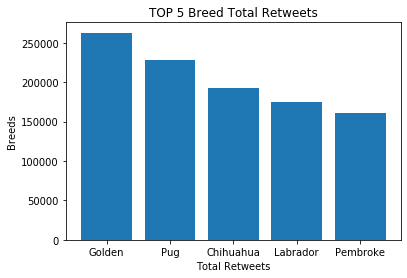

In [1047]:
plt.xticks(y_pos, breeds)
plt.bar(y_pos, total_tweets)
plt.title("TOP 5 Breed Total Retweets")
plt.xlabel("Total Retweets")
plt.ylabel("Breeds");

###### 5.3. What are the TOP 3 mentioned dog names on the tweets?

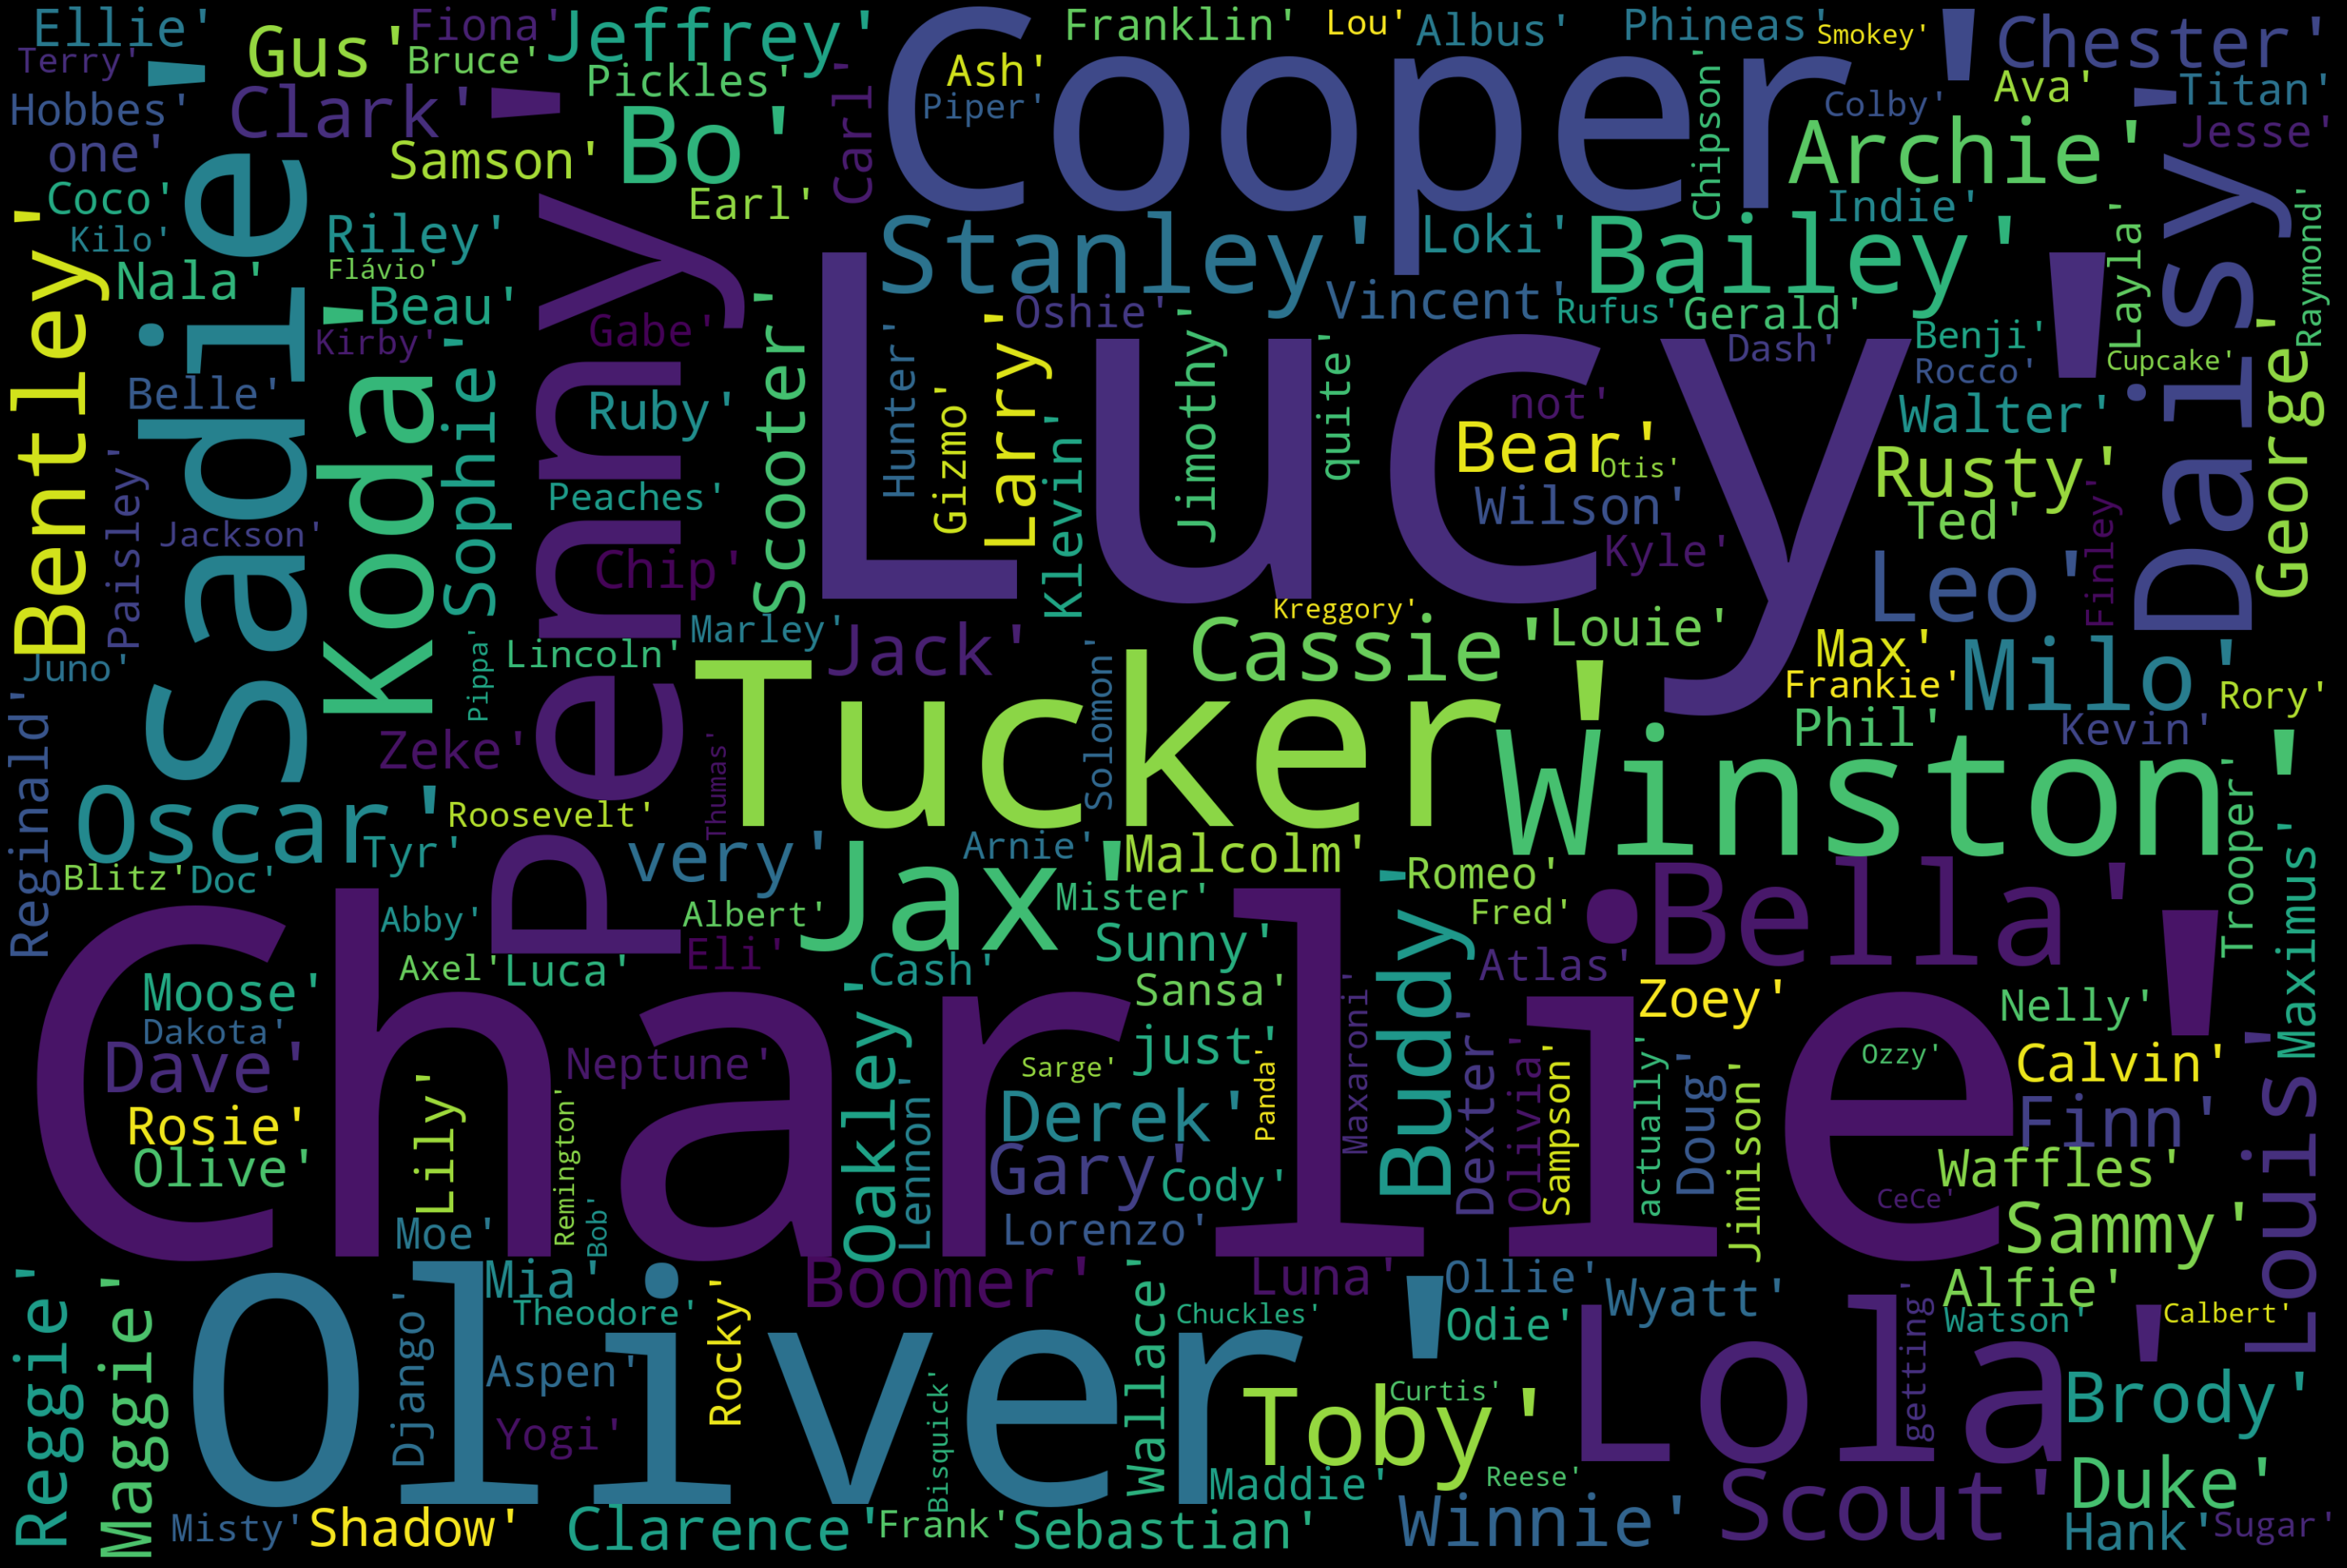

In [1048]:
# Creating a word cloud for the dog names
# source code: https://www.mikulskibartosz.name/word-cloud-from-a-pandas-data-frame/

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
not_name_list = ['None', 'Name', 'a']
text = list(joined_df.query('name != @not_name_list')['name'])
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

<a id='reporting'></a>
### 6. Reporting

The correlation between Rating and Favorite count is weak (0.44) as the correlation of Rating and Retweet count (0.34). There is a strong correlation here between Favorite and Retweet counts (0.92), meaning that is very likely that the tweets with large number of retweets tend to have a large number of favorite counts, and vice-versa.

The Golden Retriever is the breed with the most Retweet count (around 250,000 retweets), followed by the Pug, Chihuahua, Labrador Retriever and Pembroke breeds.

Lucy, Charlie and Oliver were the top 3 most mentioned dog names on the tweets. 